# Linear Interpolation

### PROBLEM SET 2.1

1. Given the data points<br>


$
\begin{array}{|c|c|c|c|}
 \hline
x &−1.2 &0.3& 1.1 \\\hline
y & −5.76& −5.61& −3.69 \\\hline
\end{array}
$

<br>determine $y$ at $x = 0$ using
- (a) Neville’s method and
- (b) Lagrange’s method.

## **(a) Neville’s method**

Если нужно интерполировать разные точки x одним и тем же полиномом, хорошо подойдет метод Ньютона: сначала вычисляются коэффициенты полинома по имеющимся значениям x и y, а затем и сам полином.

Если же необходимо интерполировать только одну точку, лучше всего это сделать **методом Невилла**.

Это рекурсивный метод вычисления значения полинома интерполяции в заданной точке, с помощью которого легко добавлять точки интерполяции по мере продвижения. Он менее подходит для выражения интерполяционного полинома.

Учитывая множество точек данных $n+1$ $(x_{i},y_{i})$, где нет двух $x_{i}$ одинаковых, интерполирующий многочлен является многочленом $p$ степени не более $n$ со свойством

$p(x_{i})=y_{i}$  для всех $i = 0,...,n$

Этот многочлен существует и единственнен. Алгоритм Невилла вычисляет многочлен в какой-то точке x.

Пусть $p_{i,j}$ обозначает многочлен степени $j − i$, который проходит через точки $(x_{k},y_{k})$ для $k = i, i + 1, ..., j$. $p_{i,j}$ удовлетворяют рецидивному соотношению

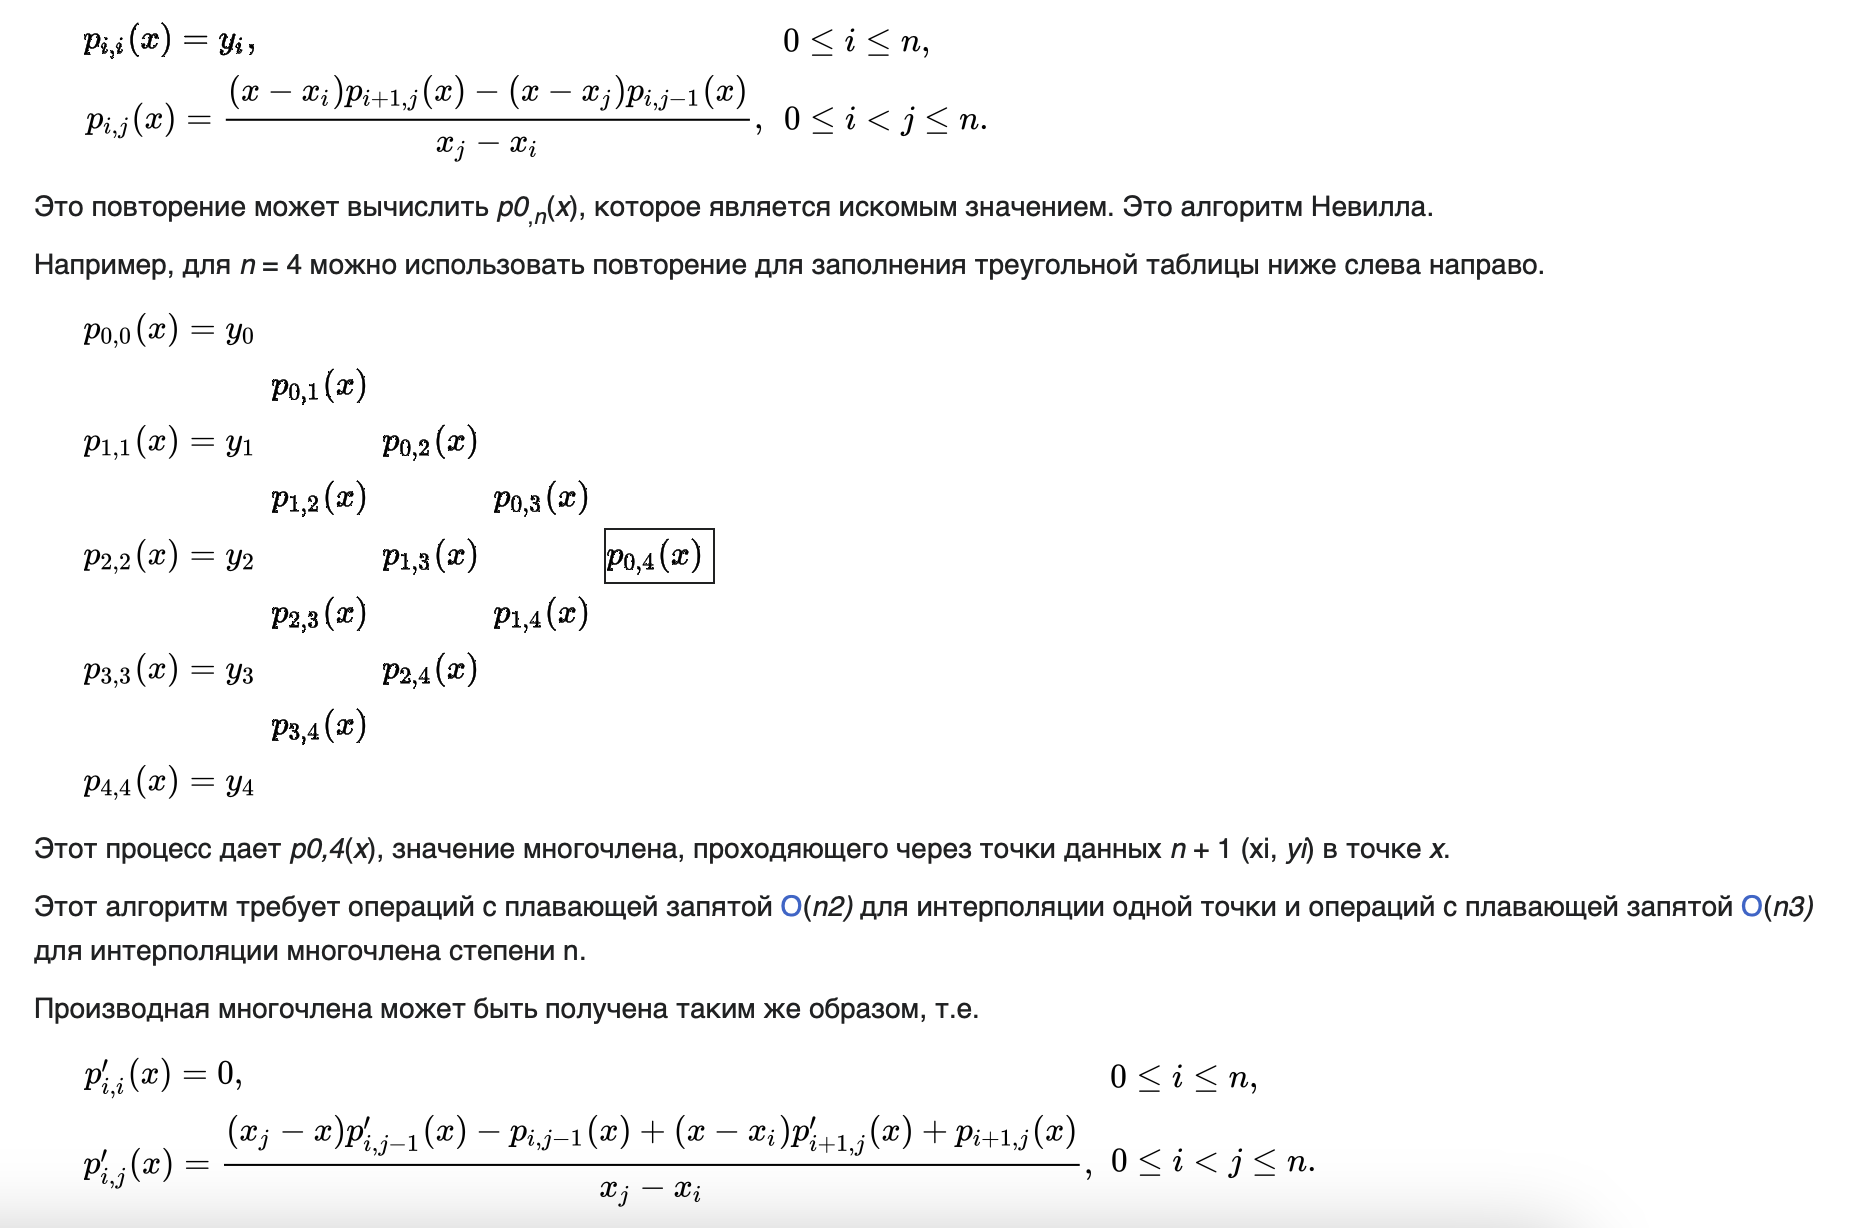

In [ ]:
from numpy import asarray

In [ ]:
def neville(xData, yData, x):
    """
    Input
      xData: одномерный массив длиной m
      yData: одномерный массив длиной m
      x: точка, которую необходимо интерполировать
    Output
      p[0]: the polynomial of degree n
    """
    m = len(xData)
    y = yData.copy()
    for k in range(1,m):
        y[0:m-k] = ((x-xData[k:m])*y[0:m-k]+ \
                        (xData[0:m-k]-x)*y[1:m-k+1])/ \
                        (xData[0:m-k]-xData[k:m])
    return y[0]

In [ ]:
xData = asarray([-1.2, 0.3, 1.1])
yData = asarray([-5.76, -5.61, -3.69])

In [ ]:
print (neville(xData, yData, 0))

-6.000000000000002


## **(b) Lagrange’s method.**

Метод Лагранжа находит один многочлен, проходящий через все точки данных. Этот многочлен называется полиномом Лагранжа и обладает свойством: $L(x_i) = y_i$  для каждой точки в массиве данных.



Базис
$$
P_i(x) = \prod_{j = 1, j\ne i}^n\frac{x - x_j}{x_i - x_j},
$$

Полином
$$
L(x) = \sum_{i = 1}^n y_i P_i(x).
$$

Ж. Л. Лагранж предложил следующий способ вычисления таких многочленов:

$L(x) = \sum_{i = 1}^n y_i l_i(x)$

Для любого $i=0,…,n$ многочлен $l_i$ имеет степень $n$ и

$l_{i}(x_{j}) = \left\{ \begin{array}{cl}
0 & : \ i\neq j \\
1 & : \ i=j
\end{array} \right.
$

Отсюда следует, что $L(x)$, являющийся линейной комбинацией многочленов $l_i(x)$, имеет степень не больше $n$ и $L(x_i) = y_i$.

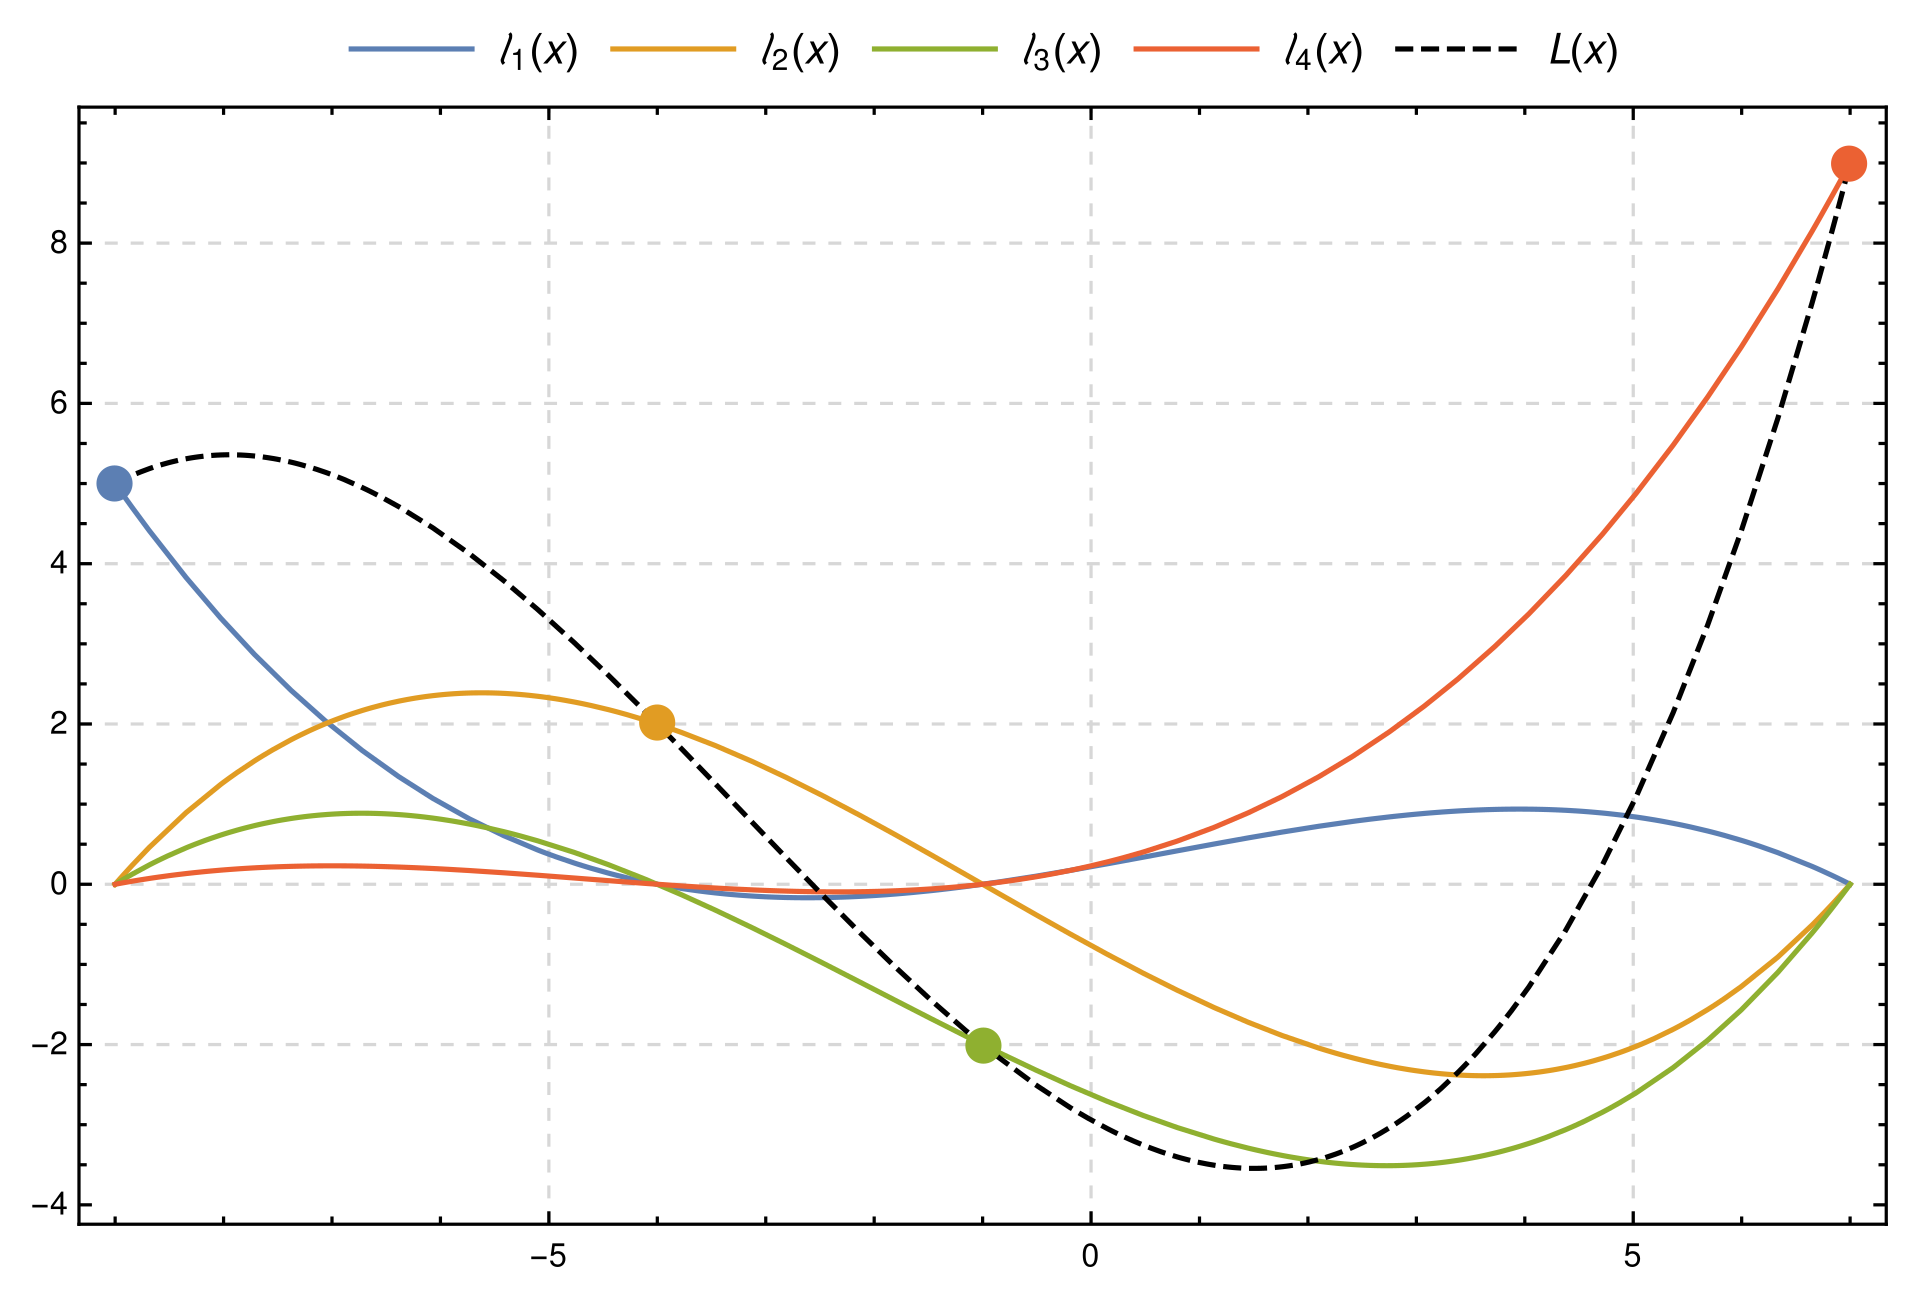



> Интерполяционный многочлен Лагранжа для четырёх точек (-9,5), (-4,2), (-1,-2) и (7,9), а также полиномы, каждый из которых проходит через одну из выделенных точек, и принимает нулевое значение в остальных.




In [ ]:
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

In [ ]:
"""
Входные данные
"""
x = [-1.2, 0.3, 1.1]
y = [-5.76, -5.61, -3.69]

In [ ]:
"""
Определим количество точек
"""
m = len(x)

In [ ]:
"""
Степень полинома
"""
n = m - 1

In [ ]:
"""
Так как будет производиться суммирование, нужно указать начальное значение у суммы. И точку, которую будем интерполировать
"""
xp=0
yp=0

In [ ]:
for i in range(n+1):
  p = 1
  for j in range(n+1):
    if j != i:
      p *=(xp - x[j])/(x[i]-x[j])
  yp += y[i]*p

print('For x = %.2f, y=%.f' % (xp,yp))

For x = 0.00, y=-6


In [ ]:
"""
Можно сделать, например, проверку по уже известным значениям, чтобы убедиться, что код работает и метод осуществляется
"""
xp= float(input("Enter x = "))
yp=0
for i in range(n+1):
  p = 1
  for j in range(n+1):
    if j != i:
      p *=(xp - x[j])/(x[i]-x[j])
  yp += y[i]*p

print('For x = %.2f, y=%.f' % (xp,yp))

Enter x = 1.1
For x = 1.10, y=-4


4. Use Neville’s method to compute $y$ at $x = \pi/4$ from the data points

$
\begin{array}{|c|c|c|c|c|c|}
 \hline
x& 0& 0.5& 1& 1.5& 2 \\\hline
y &−1.00& 1.75& 4.00& 5.75& 7.00 \\\hline
\end{array}
$

In [ ]:
from numpy import asarray
import math
def neville(xData, yData, x):
    """
    Input
      xData: одномерный массив длиной m
      yData: одномерный массив длиной m
      x: точка, которую необходимо интерполировать
    Output
      p[0]: the polynomial of degree n
    """
    m = len(xData)
    y = yData.copy()
    for k in range(1,m):
        y[0:m-k] = ((x-xData[k:m])*y[0:m-k]+ \
                        (xData[0:m-k]-x)*y[1:m-k+1])/ \
                        (xData[0:m-k]-xData[k:m])
    return y[0]

In [ ]:
xData = asarray([0, 0.5, 1, 1.5, 2])
yData = asarray([-1.00, 1.75, 4.00, 5.75, 7.00])

In [ ]:
print (neville(xData, yData, math.pi/4))

3.095538705316605


#  Least-Squares Fit

2. Use linear regression to find the line that fits the data

\begin{array}{|c|c|c|c|c|c|}
\hline
x &−1.0 &−0.5 &0 &0.5 &1.0  \\ \hline
y &−1.00 &−0.55 &0.00 &0.45 &1.00  \\ \hline
\end{array}

and determine the standard deviation.

In [ ]:
import sys
sys.path.insert(0, './lib2b')


Estimated coefficients:
b_0 = -0.020000000000000018            
b_1 = 1.0
Std. deviation = 0.050000000000000044


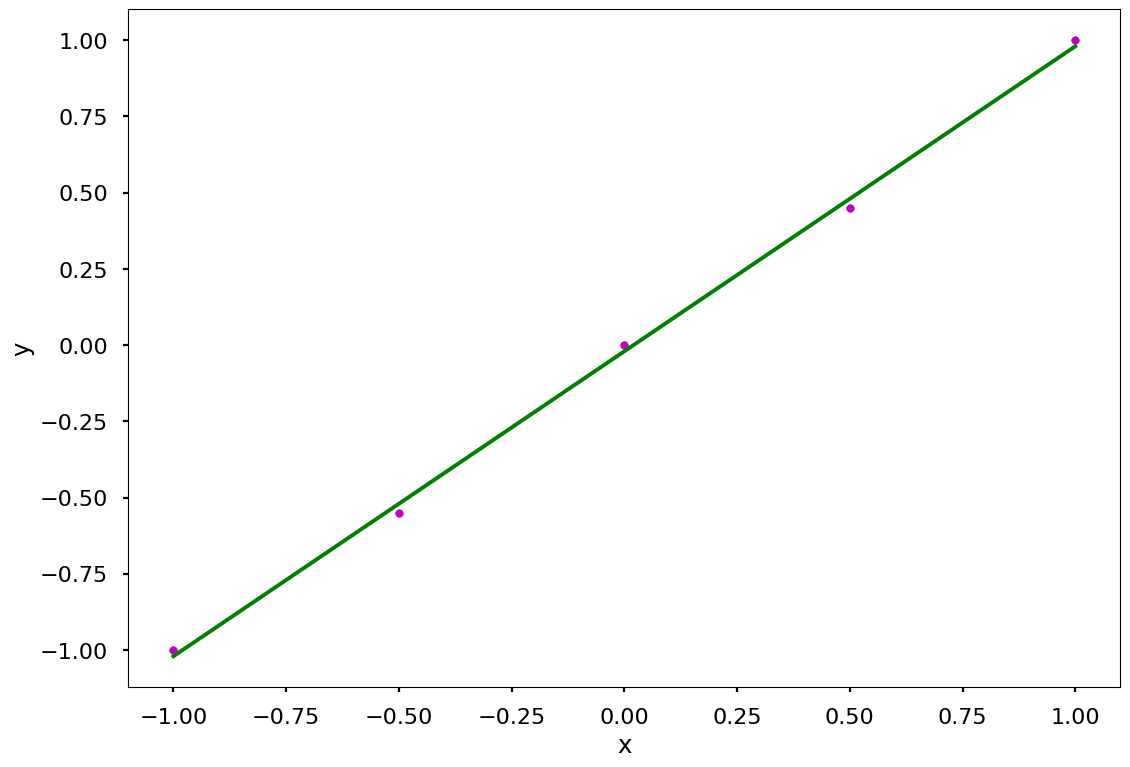

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def estimate_coef(x, y):
    # количество точек
    n = np.size(x)

    # средние значения x и y векторов
    m_x = np.mean(x)
    m_y = np.mean(y)

    # вычисляем перекрестное отклонение и отклонение около x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x

    # вычисляем кооэффициенты
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x

    return (b_0, b_1)

def plot_regression_line(x, y, b):
    # построение точек по данным в виде точечной диаграммы
    plt.scatter(x, y, color = "m",
               marker = "o", s = 30)

    # аппроксимация прямой
    y_pred = b[0] + b[1]*x

    # добавляем аппроксимацию на график
    plt.plot(x, y_pred, color = "g")

    # названия осей
    plt.xlabel('x')
    plt.ylabel('y')

    # демонстрация графика
    plt.show()

def main():
    # данные
    x = np.array([-1.0, -0.5, 0, 0.5, 1.0])
    y = np.array([-1.00, -0.55, 0.00, 0.45, 1.00])

    # коэффициенты
    b = estimate_coef(x, y)
    print("Estimated coefficients:\nb_0 = {}  \
          \nb_1 = {}".format(b[0], b[1]))
    m = 1
    n = np.size(x)
    y_coeff_data = [x[i]*b[1]+ b[0] for i in range(n)]
    s = 0
    for i in range(n):
        s = s + y_coeff_data[i]
    dev = math.sqrt(math.pow(s,2)/(n-m))
    print("Std. deviation =", dev )

    # построение графика
    plot_regression_line(x, y, b)


if __name__ == "__main__":
    main()


> Можно проверить получившийся результат с помощью встроенной функции



/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


Coefficients are:
 [ 1.53863257e-01 -1.17216117e-01  7.43375950e-02  1.46520147e-01
 -2.28200852e-01  9.70695971e-01 -7.44760246e-17]


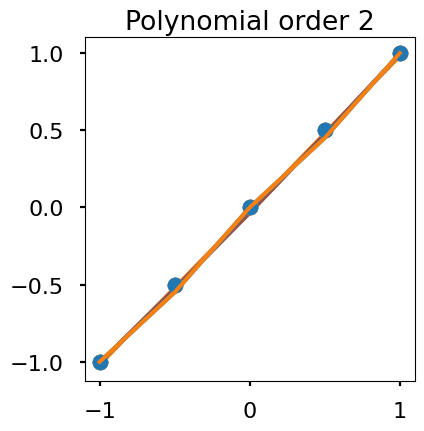

In [ ]:
plt.figure(figsize = (12, 8))
for i in range(1, 7):

    #Получим коэффициенты
    coeff_y = np.polyfit(xData, yData, i)
    plt.subplot(2,3,2)
    plt.plot(xData, xData, 'o')
    #Вычислим значение полинома
    plt.plot(xData, np.polyval(coeff_y, xData))
    plt.title(f'Polynomial order {2}')

print("Coefficients are:\n",coeff_y)
plt.tight_layout()
plt.show()

In [ ]:
import plotly
import numpy as np
import pandas as pd
import statistics as stat

In [ ]:
import math

In [ ]:
xData = np.array([-1.0, -0.5, 0, 0.5, 1.0])
yData = np.array([-1.00, -0.55, 0.00, 0.45, 1.00])
n = len(xData)

Найдем стандартное отклонение
$$σ =\sqrt\frac{S}{n − m} \tag{4}
$$
где
$$S(a_0,a_1,...,a_m)=\sum\limits_{i=0}^n[y_i - f(x_i)]^2 \tag{2}$$


Для нашей задачи

m=1

n=len(xData)

In [ ]:
import math
m = 1
coeff = np.polyfit(xData,yData,m)
y_coeff_data = [xData[i]*coeff[0]+ coeff[1] for i in range(n)]
s = 0
for i in range(n):
    s = s + y_coeff_data[i]
dev = math.sqrt(math.pow(s,2)/(n-m))
print("Coefficients are:\n",coeff)
print("Std. deviation =", dev )

Coefficients are:
 [ 1.   -0.02]
Std. deviation = 0.050000000000000155


16. The intensity of radiation of a radioactive substance was measured at half-year
intervals. The results were

\begin{array}{|c|c|c|c|c|c|c|}\hline
t (years) &0 &0.5 &1 &1.5 &2 &2.5  \\ \hline
γ &1.000 &0.994 &0.990 &0.985 &0.979 &0.977  \\ \hline
t (years) &3 &3.5 &4 &4.5 &5 &5.5  \\ \hline
γ &0.972 &0.969 &0.967 &0.960 &0.956 &0.952  \\ \hline
\end{array}

where $γ$ is the relative intensity of radiation. Knowing that radioactivity decays
exponentially with time, $γ (t) = ae^{−bt}$ , estimate the radioactive half-life of the
substance.


In [ ]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

<ipython-input-5-f74e46e2dd34>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


In [ ]:
x = np.array([0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5])
y = np.array([1.000, 0.994, 0.990, 0.985, 0.979, 0.977, 0.972, 0.969, 0.967, 0.960, 0.956, 0.952])

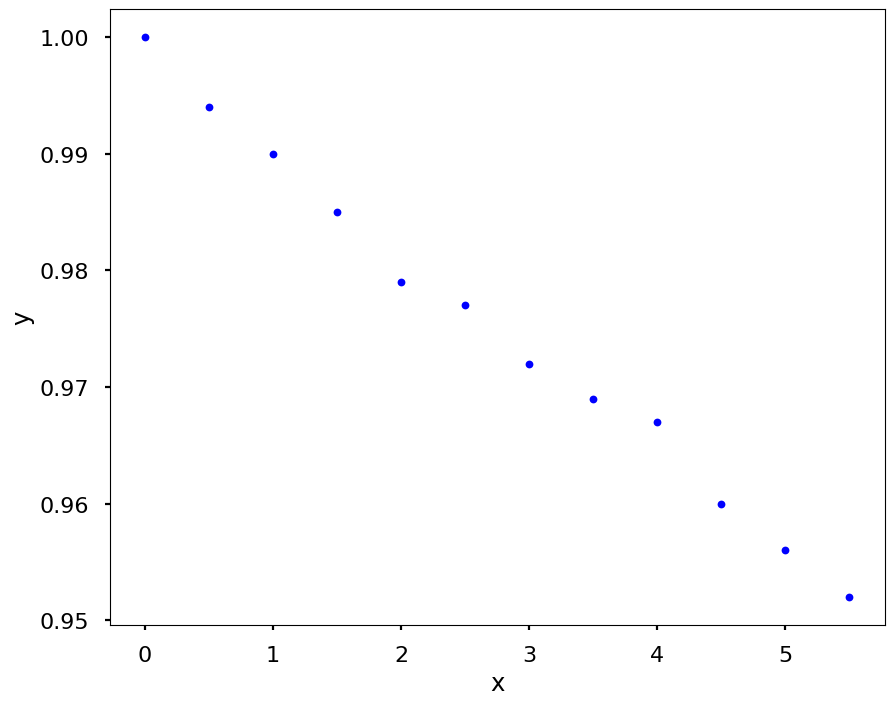

In [ ]:
plt.figure(figsize = (10,8))
plt.plot(x, y, 'b.')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Воспользуемся основными свойствами логарифма

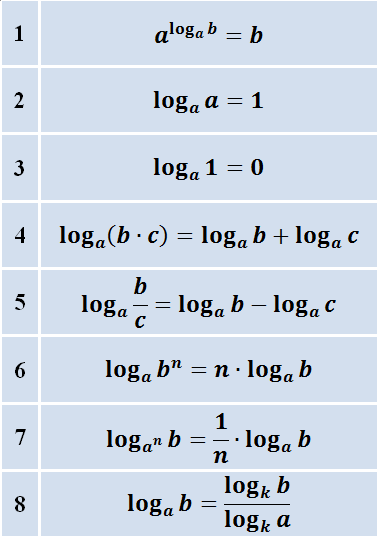

In [ ]:
A = np.vstack([x, np.ones(len(x))]).T
beta, log_alpha = np.linalg.lstsq(A, np.log(y), rcond = None)[0]
alpha = np.exp(log_alpha)
print(f'alpha={alpha}, beta={beta}')

alpha=0.9984157812833949, beta=-0.008639549701453636


Посмотрим, как получилось :)

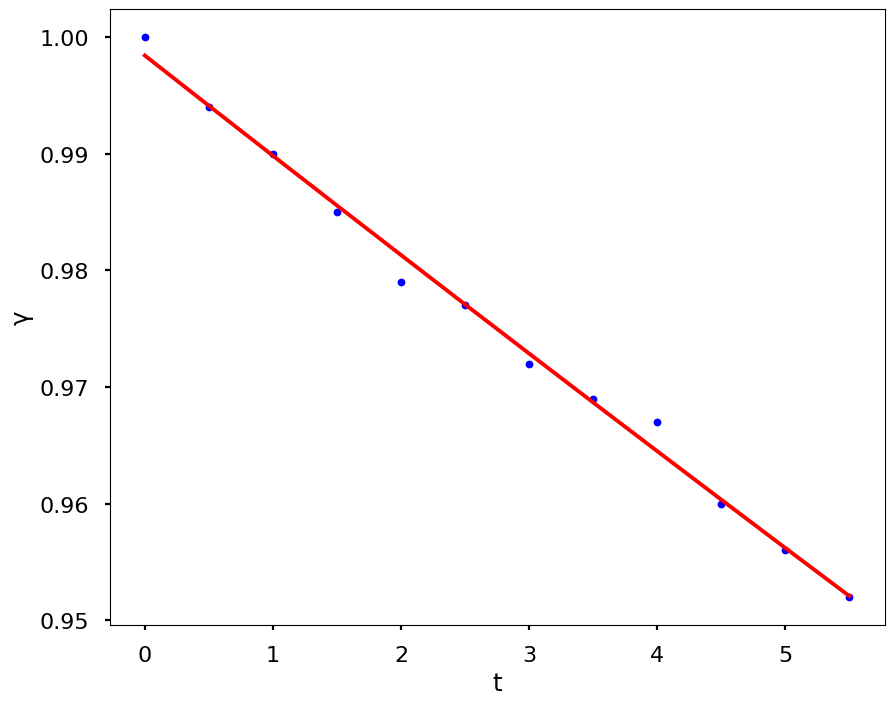

In [ ]:
plt.figure(figsize = (10,8))
plt.plot(x, y, 'b.')
plt.plot(x, alpha*np.exp(beta*x), 'r')
plt.xlabel('t')
plt.ylabel('γ')
plt.show()



> Найдем период полураспада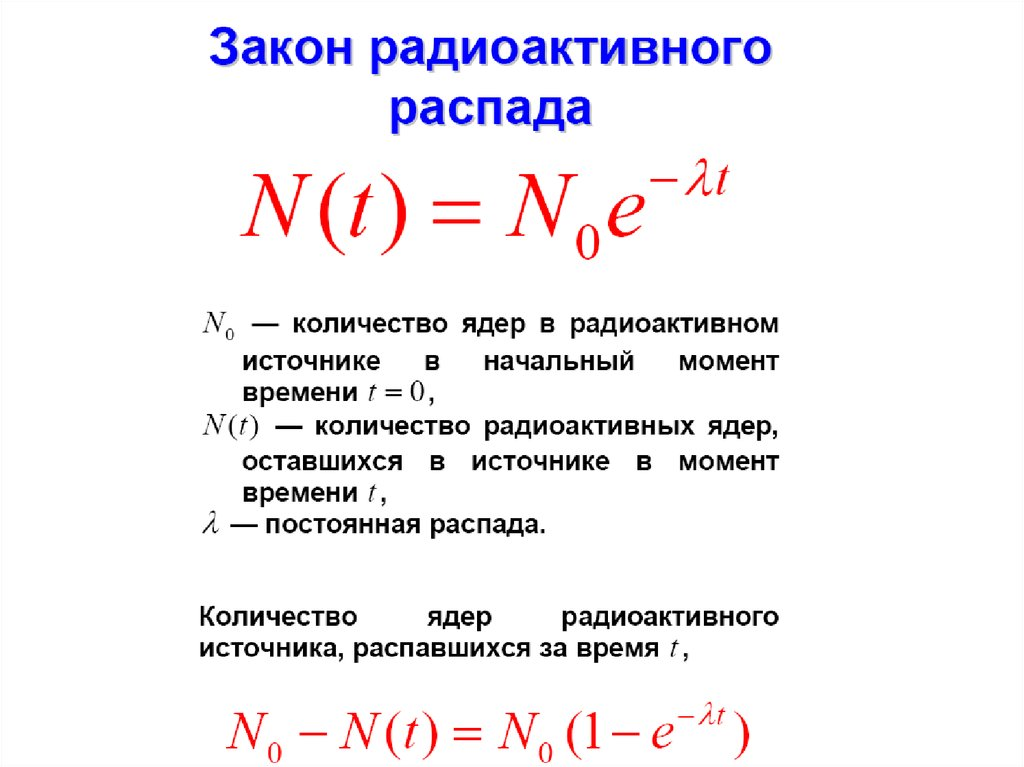



# $\lambda=\frac{ln2}{T_{\frac{1}{2}}}$

In [ ]:
import math

In [ ]:
T = -np.log(2)/beta

In [ ]:
print(f'Период полураспада={T}')

Период полураспада=80.22954951498464
